## *Load Basic Libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

## *Load Data*

In [3]:
url = "C:\\Users\\PC\\Desktop\\Ciencias de datos\\Proyectos\\Criaglist\\data\\vehicles.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


# *Data Preprocesing*

### Drop Columns

In [5]:
drops = ['id','url','region_url',
         'size','image_url','description',
         'county','state','lat',
        'long','posting_date','VIN',
         'region']

In [6]:
df = df.drop(columns = drops)

Eliminate variables that do not provide predictive value.

### *Drop Duplicate Values*

In [7]:
df = df.drop_duplicates()

## NaN Values

In [8]:
def null_values_percent(df):
    return  df.isnull().sum() / df.shape[0]

In [9]:
null_values_percent(df)

price           0.000000
year            0.002801
manufacturer    0.043751
model           0.014874
condition       0.398928
cylinders       0.360300
fuel            0.006881
odometer        0.010182
title_status    0.016958
transmission    0.005474
drive           0.284632
type            0.252369
paint_color     0.301191
dtype: float64

The Year variable can replace the missing values by some statistical measure, in this case I will choose to use the median, while for the object type variables we can replace with the modal value.

### *Replace NaN Values*

In [10]:
df['year'] = df.year.fillna(df['year'].median())
df['odometer'] = df.odometer.fillna(df['odometer'].median())

We replace the missing values by the median.

In [11]:
def nan_to_mode(df):
    cols = df.select_dtypes('object').columns
    nan_percent = null_values_percent(df)
    cols = [col for col in cols if nan_percent[col]>0 and nan_percent[col]<0.10]
    for col in cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    return df

We select the categorical variables that provide less than 10% of missing data to be able to replace them using the mode.

In [12]:
df = nan_to_mode(df)

In [13]:
null_values_percent(df)

price           0.000000
year            0.000000
manufacturer    0.000000
model           0.000000
condition       0.398928
cylinders       0.360300
fuel            0.000000
odometer        0.000000
title_status    0.000000
transmission    0.000000
drive           0.284632
type            0.252369
paint_color     0.301191
dtype: float64

## *Ordinal Data*

In [14]:
df.cylinders.unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

Obviously the cylinders variable is of numeric type, so we will remove the string.

In [15]:
df.cylinders = df.cylinders.str.replace('cylinders','')

We replace the string of characters, eliminate categories that do not add value and convert the variable to a numeric type.

In [16]:
df.cylinders.unique()

array([nan, '8 ', '6 ', '4 ', '5 ', 'other', '3 ', '10 ', '12 '],
      dtype=object)

In [17]:
df = df.query('cylinders!="other"')

Delete this "other" category for the cylinders variable.

In [18]:
df.cylinders = df.cylinders.astype(np.float32)

## *EDA*

In [19]:
colors = sns.color_palette('pastel')
plt.style.use('ggplot')

In [20]:
df[['year','odometer','price']].agg({'min','max'})

,year,odometer,price
max,2022.0,10000000.0,3736928711
min,1900.0,0.0,0


There are indications of outliers in both variables, for example in this dataset it is oriented to pre-owned and used vehicles, therefore it is impossible for a car to have zero kilometers and it is also very unusual that there are vehicles with a fairly high mileage.

It is impossible that there are vehicles with a price of zero dollars and also with an extratospheric price.

Cars with a year of manufacture that are quite old for today's reality are appreciated, this type of car is aimed at a very specific public.

In [21]:
class Plots():
    
    def __init__(self,feature):
        self.feature = feature
    
    def sccater(self):
        color_idx = np.random.randint(0,7)
        df.plot(kind = "scatter",
        x = self.feature,
        y = "price",
        figsize = (15,5),
           color = colors[color_idx])
        
    def histogram(self):
        color_idx = np.random.randint(0,5)
    
        df.plot(kind = "hist",
            y = self.feature,
            color = colors[color_idx],
            ec = "c",
           figsize = (15,5),
            lw = 3)
        
    def countplot(self):
        fig,ax = plt.subplots(1,1,figsize = (15,6))
        sns.countplot(data = df,y = self.feature,palette ="pastel",ax = ax)

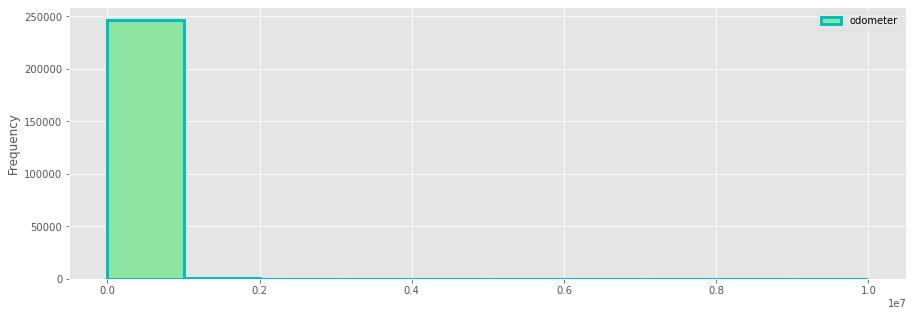

In [22]:
Plots('odometer').histogram()

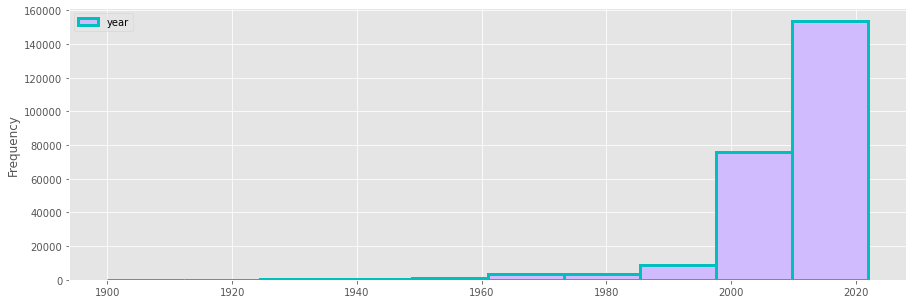

In [23]:
Plots('year').histogram()

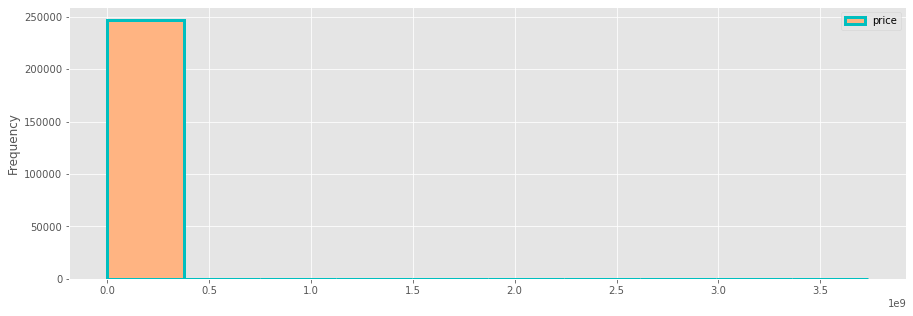

In [24]:
Plots('price').histogram()

As you can see, the three histograms have serious symptoms of outliers, as we saw previously.

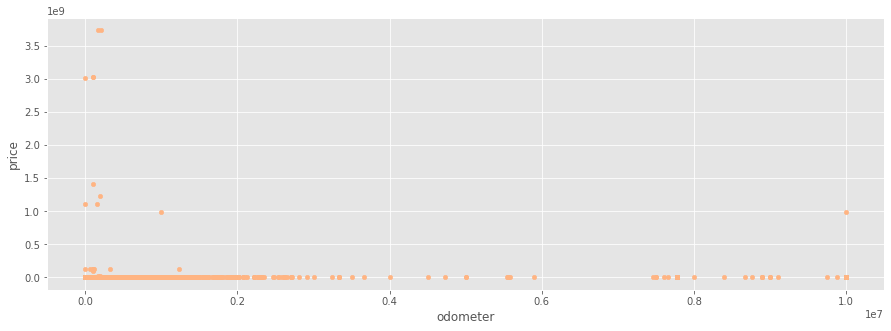

In [25]:
Plots('odometer').sccater()

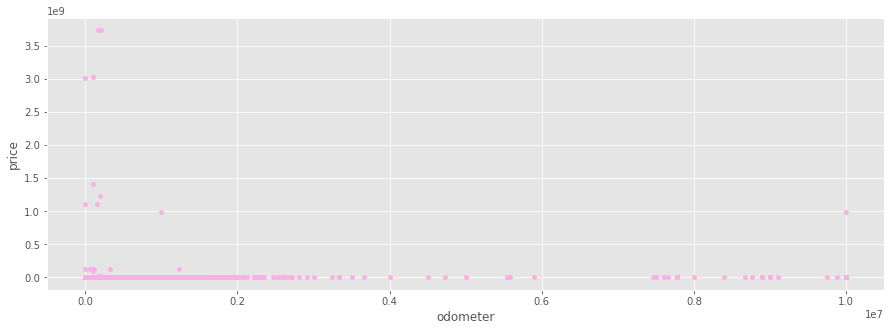

In [27]:
Plots('odometer').sccater()

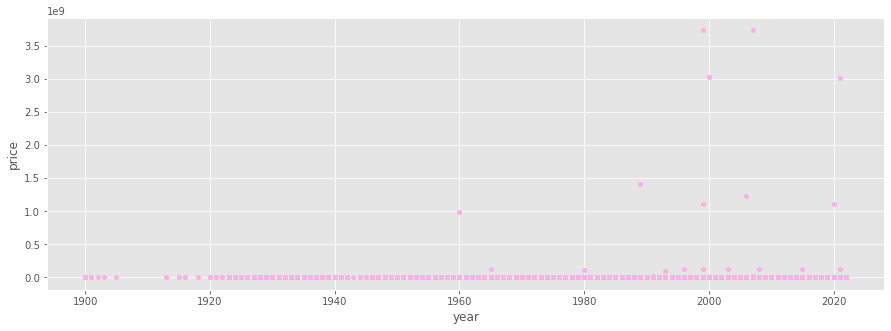

In [28]:
Plots('year').sccater()

Due to the lag of abnormal values, it is not possible to see a clear relationship between both numerical variables.

In [29]:
def barplot(gb_feature,feature,title):
    
    df.groupby(gb_feature)[feature] \
    .median() \
    .sort_values() \
    .plot(kind = "barh",
      color = colors,
      figsize = (15,8),
      title = title,
     fontsize = 15)

We use the median statistical measure, as it is less sensitive to outliers.

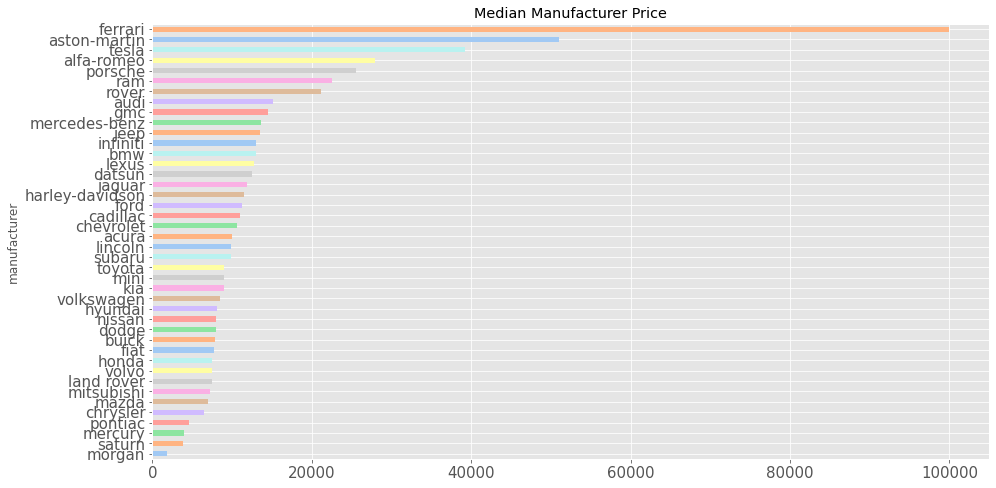

In [30]:
barplot('manufacturer','price','Median Manufacturer Price')

The car manufacturers that are above the graph are generally manufacturers of premium cars, they are more expensive since they are safer and more powerful vehicles.

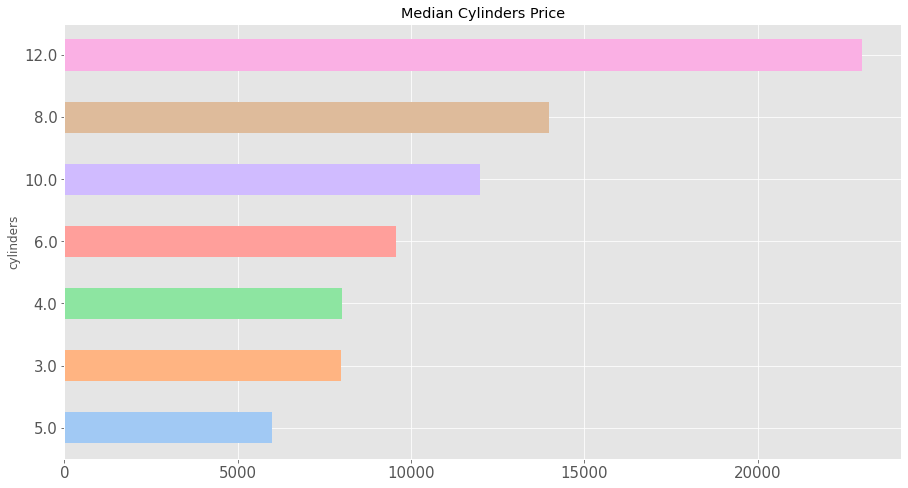

In [31]:
barplot('cylinders','price','Median Cylinders Price')

It makes sense that cars with the largest number of cylinders would be averagely priced, since they have a more powerful engine.

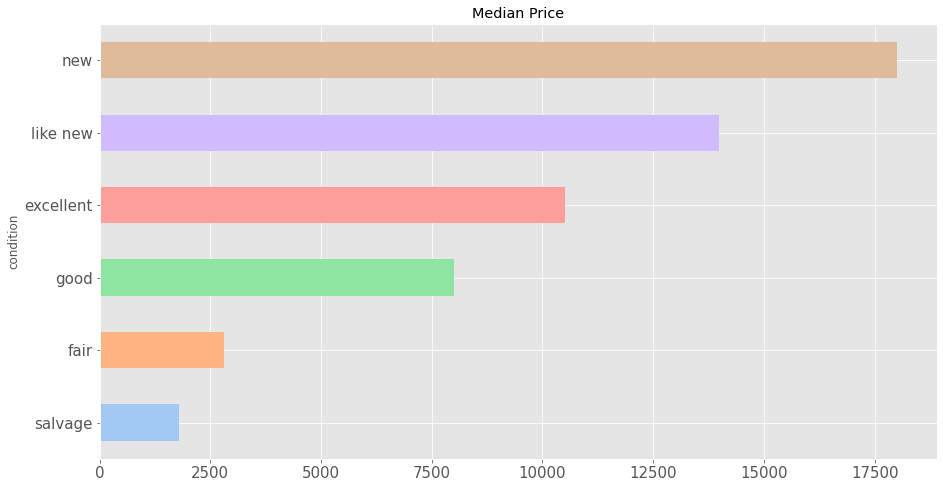

In [32]:
barplot('condition','price','Median Price')

New cars have zero mileage, so it's probably a data extraction failure.

It makes all the sense in the world that cars in better condition do not have lower mileage, since they have less wear.

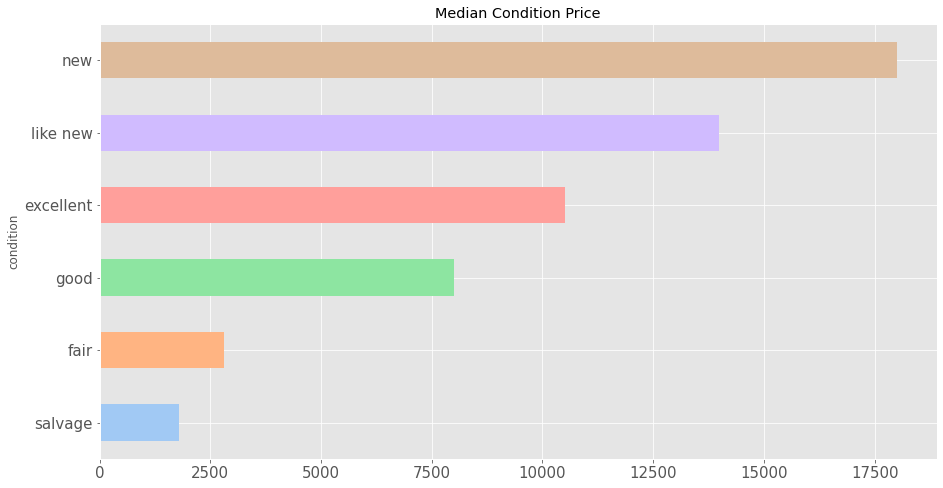

In [33]:
barplot('condition','price','Median Condition Price')

Vehicles that are in better condition generally have a better price, although you may see exceptions for example the price of a 2021 Chevrolet Aveo with just 5,000 miles will cost less than a 2018 Ford Mustang with 80,000 miles.

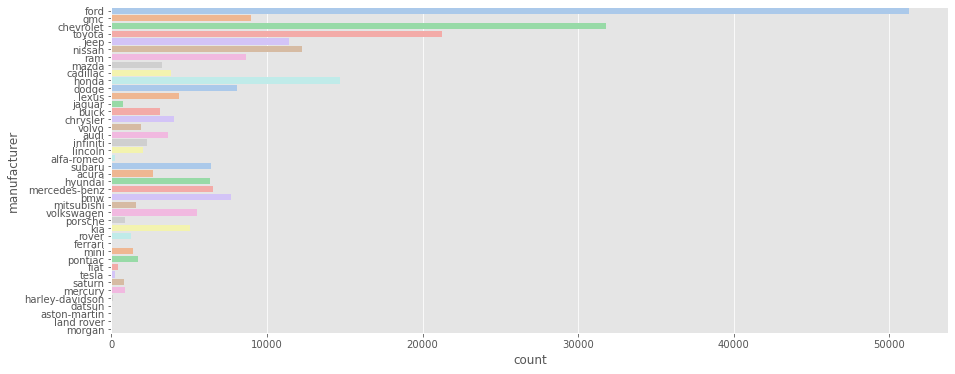

In [34]:
Plots('manufacturer').countplot()

It makes sense that general brands are more present in car lots, as well as being more affordable than a premium brand.

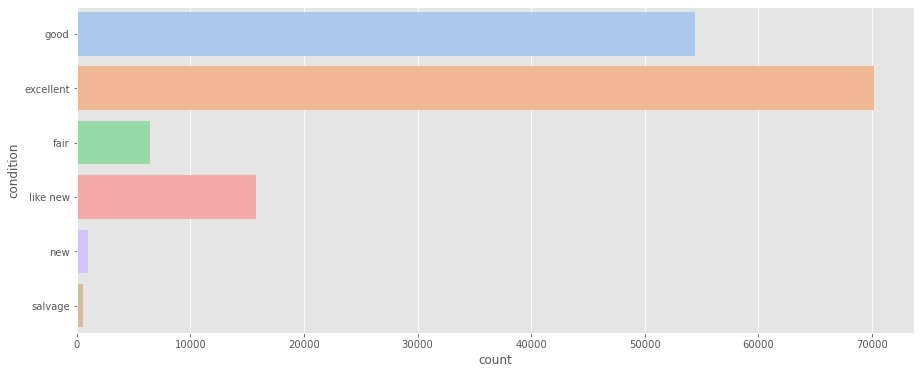

In [35]:
Plots('condition').countplot()

Most users seek to buy a car in good condition, there are very few cases where they seek to buy a car in worse condition to fix it and sell it at a higher price.

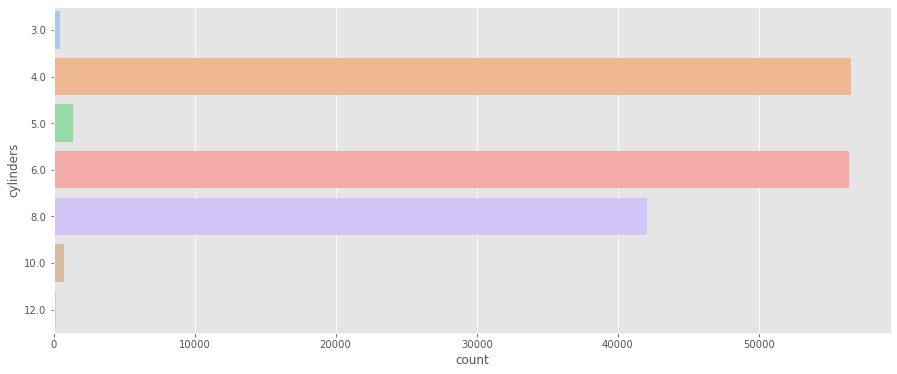

In [36]:
Plots('cylinders').countplot()

It makes a lot of sense that four-cylinder cars are best sellers, since they are family vehicles with reasonable gas mileage.

## *Save Data*

We save the data to later dedicate to cleaning.

In [37]:
url = "C:\\Users\\PC\\Desktop\\Ciencias de datos\\Proyectos\\Criaglist\\data\\vehicles.parquet"
df.to_parquet(url)